## **Supervised learning methods: Linear Regression, Logistic Regression and Support Vector Machines (SVMs)**

Submitted as an assignment for Applied Machine Learning course @ Columbia University.

Includes:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [ ]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from tabulate import tabulate

## Part 1: Data Visualization and Analysis

The dataset to be used for this section is `bike_rental.csv`. Target variable: `count` (# of bikes rented)

In [ ]:
# Load the dataset
bike_rental_df = pd.read_csv('./Data/bike_rental.csv')
bike_rental_df.head()

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Set palette
sns.set_palette("pastel6")

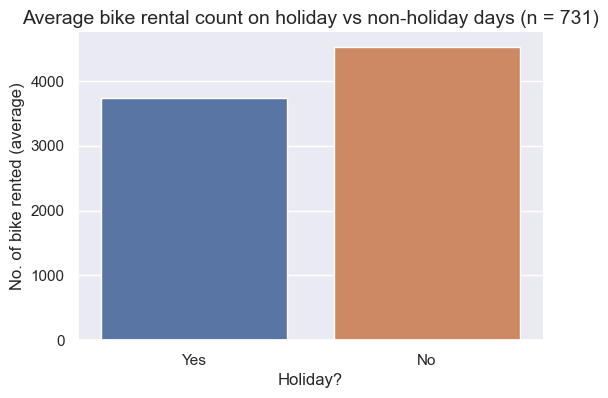

In [ ]:
# Barplot of avg. bike rented by holiday vs non-holiday days
sns.set(rc = {'figure.figsize':(6,4)}) # reset dimensions of the plot

plot1 = sns.barplot(data=bike_rental_df, x='holiday', y='count', order=('Yes', 'No'), estimator='mean', errorbar=None)
plot1.set_xlabel('Holiday?', fontsize=12)
plot1.set_ylabel('No. of bike rented (average)', fontsize=12)
plot1.set_title('Average bike rental count on holiday vs non-holiday days (n = 731)', fontsize=14)
plot1.spines[['top', 'right']].set_visible(False)
plt.show()

In [ ]:
# The average bike rentals on holidays seem to be lower on holidays vs non-holidays.

1. Bike rentals by **month**

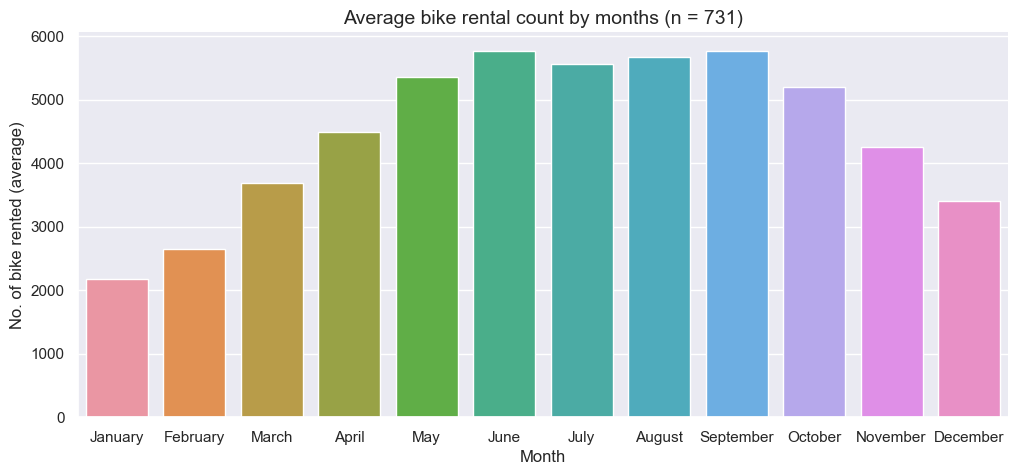

In [ ]:
## Barplot of average bike rentals by month
sns.set(rc = {'figure.figsize':(12,5)})

plot2 = sns.barplot(data=bike_rental_df, x='month', y='count', estimator='mean', errorbar=None)
plot2.set_xlabel('Month', fontsize=12)
plot2.set_ylabel('No. of bike rented (average)', fontsize=12)
plot2.set_title('Average bike rental count by months (n = 731)', fontsize=14)
plot2.spines[['top', 'right']].set_visible(False)
plt.show()

We can see that summer months (May-Sept) have the highest average bike rentals. However, we cannot understand the distribution of data from barplots (which ony shows mean count). To see data distribution, we will use boxplots.

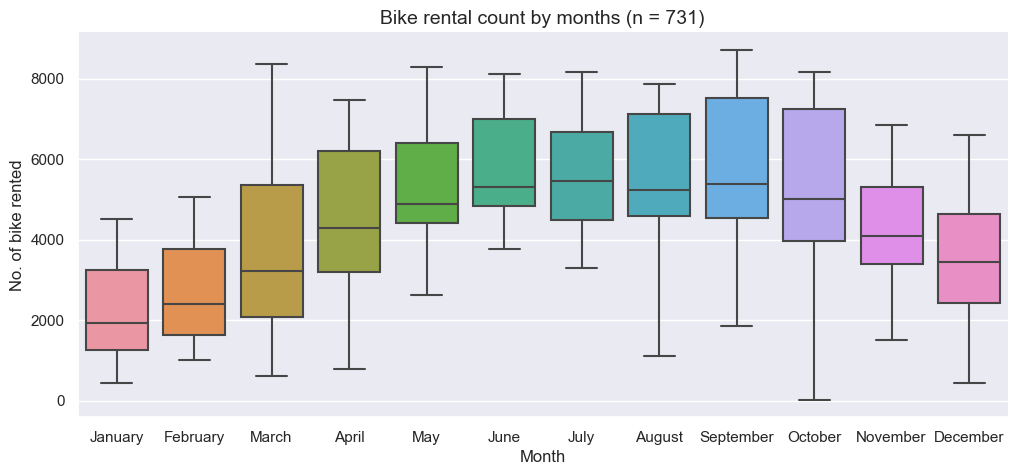

In [ ]:
## Boxplot of average bike rentals by month
plot3 = sns.boxplot(data=bike_rental_df, x='month', y='count')
plot3.set_xlabel('Month', fontsize=12)
plot3.set_ylabel('No. of bike rented', fontsize=12)
plot3.set_title('Bike rental count by months (n = 731)', fontsize=14)
plot3.spines[['top', 'right']].set_visible(False)
plt.show()

We can see that monthly distribution of rental is right-skewed i.e., median is closer to first quartile.

2. Bike rentals by **season**

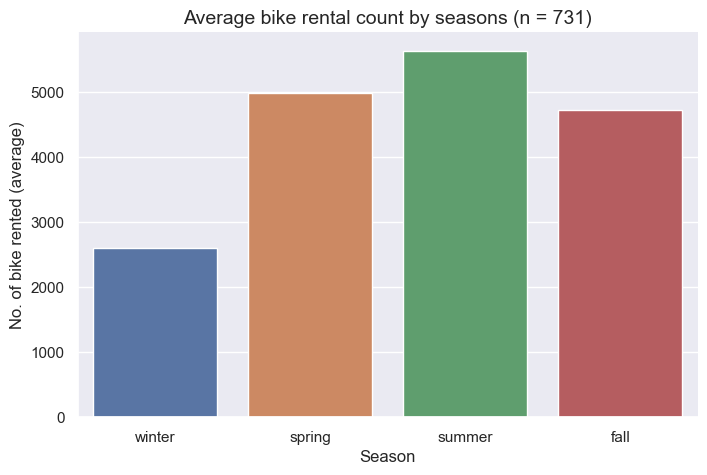

In [ ]:
## Barplot of average bike rentals by season
sns.set(rc = {'figure.figsize':(8,5)}) # set plot dimensions

plot4 = sns.barplot(data=bike_rental_df, x='season', y='count', estimator='mean', errorbar=None)
plot4.set_xlabel('Season', fontsize=12)
plot4.set_ylabel('No. of bike rented (average)', fontsize=12)
plot4.set_title('Average bike rental count by seasons (n = 731)', fontsize=14)
plot4.spines[['top', 'right']].set_visible(False)
plt.show()

The seasonal data aligns with our observation of monthly distribution - bike rentals are **highest in the summer, and lowest in the winter**.

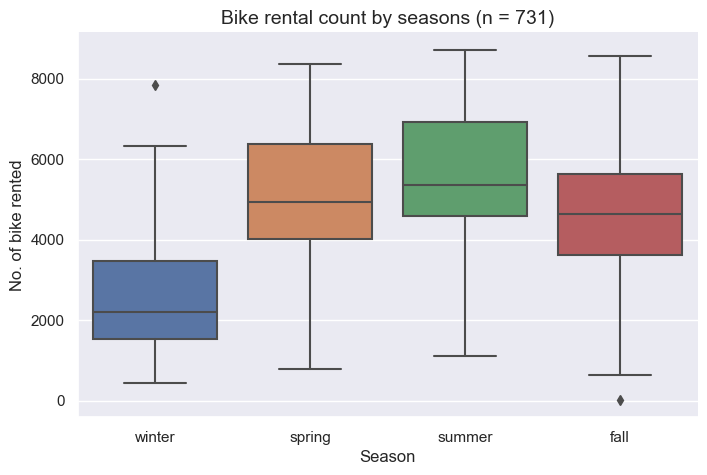

In [ ]:
## Boxplot of average bike rentals by season
sns.set(rc = {'figure.figsize':(8,5)}) # set plot dimensions

plot5 = sns.boxplot(data=bike_rental_df, x='season', y='count')
plot5.set_xlabel('Season', fontsize=12)
plot5.set_ylabel('No. of bike rented', fontsize=12)
plot5.set_title('Bike rental count by seasons (n = 731)', fontsize=14)
plot5.spines[['top', 'right']].set_visible(False)
plt.show()

3. Bike rentals by **working day**

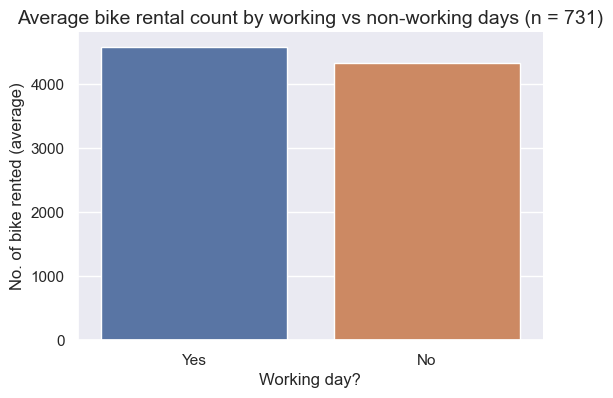

In [ ]:
sns.set(rc = {'figure.figsize':(6,4)}) # Reset figure size

plot6 = sns.barplot(data=bike_rental_df, x='working_day', y='count', order=('Yes', 'No'), estimator='mean', errorbar=None)
plot6.set_xlabel('Working day?', fontsize=12)
plot6.set_ylabel('No. of bike rented (average)', fontsize=12)
plot6.set_title('Average bike rental count by working vs non-working days (n = 731)', fontsize=14)
plot6.spines[['top', 'right']].set_visible(False)
plt.show()

Average bike rentals are higher on working vs on-working days seem to be similar. No. of rentals are slightly lower on non-working days.

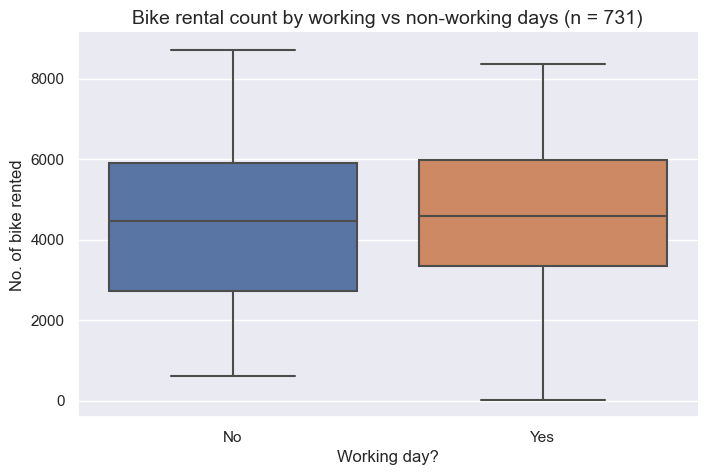

In [ ]:
## Boxplot of average bike rentals by working vs non-working day
sns.set(rc = {'figure.figsize':(8,5)}) # set plot dimensions

plot7 = sns.boxplot(data=bike_rental_df, x='working_day', y='count')
plot7.set_xlabel('Working day?', fontsize=12)
plot7.set_ylabel('No. of bike rented', fontsize=12)
plot7.set_title('Bike rental count by working vs non-working days (n = 731)', fontsize=14)
plot7.spines[['top', 'right']].set_visible(False)
plt.show()

4. Bike rentals by **weather**

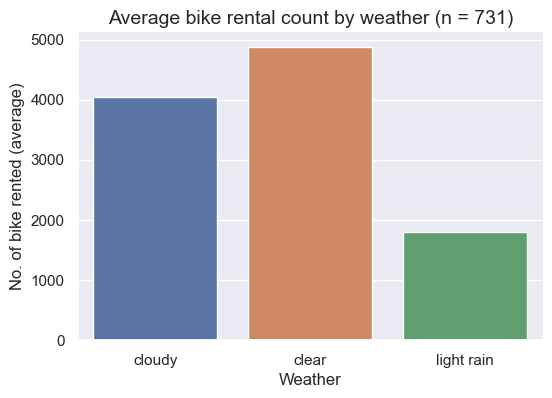

In [ ]:
sns.set(rc = {'figure.figsize':(6,4)}) # Reset figure size

plot8 = sns.barplot(data=bike_rental_df, x='weather', y='count', estimator='mean', errorbar=None)
plot8.set_xlabel('Weather', fontsize=12)
plot8.set_ylabel('No. of bike rented (average)', fontsize=12)
plot8.set_title('Average bike rental count by weather (n = 731)', fontsize=14)
plot8.spines[['top', 'right']].set_visible(False)
plt.show()

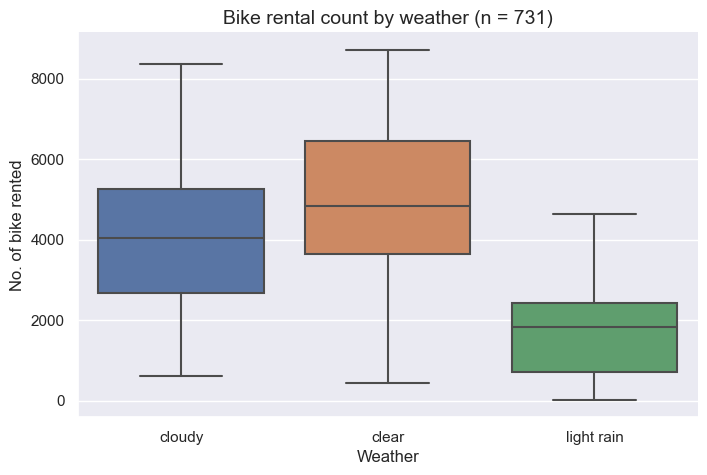

In [ ]:
## Boxplot of average bike rentals by season
sns.set(rc = {'figure.figsize':(8,5)}) # set plot dimensions

plot8 = sns.boxplot(data=bike_rental_df, x='weather', y='count')
plot8.set_xlabel('Weather', fontsize=12)
plot8.set_ylabel('No. of bike rented', fontsize=12)
plot8.set_title('Bike rental count by weather (n = 731)', fontsize=14)
plot8.spines[['top', 'right']].set_visible(False)
plt.show()

**Summary of observations**
+ Summer months (Apr-Sept) had a higher count of bikes rented as compared to other months.
+ Winter season saw the lowest count of bikes rent on average.
+ Avg. bike rented seemed to be more or less equal on working vs non-working days
+ When it rained lightly ('light rain'), the avg. count of bike rented fell.

In [ ]:
# Create a df with aggregate count by month for registered, casual and total rental count.
count_by_month = []

count_by_month = bike_rental_df.groupby('month'). agg({ # group and sum values by month
    'registered': 'sum',
    'casual': 'sum',
    'count': 'sum'
})

count_by_month = count_by_month.reindex(bike_rental_df['month'].drop_duplicates(), axis = 0).reset_index() # reset index such that final df reflects original order of months
count_by_month['month'] = count_by_month['month']

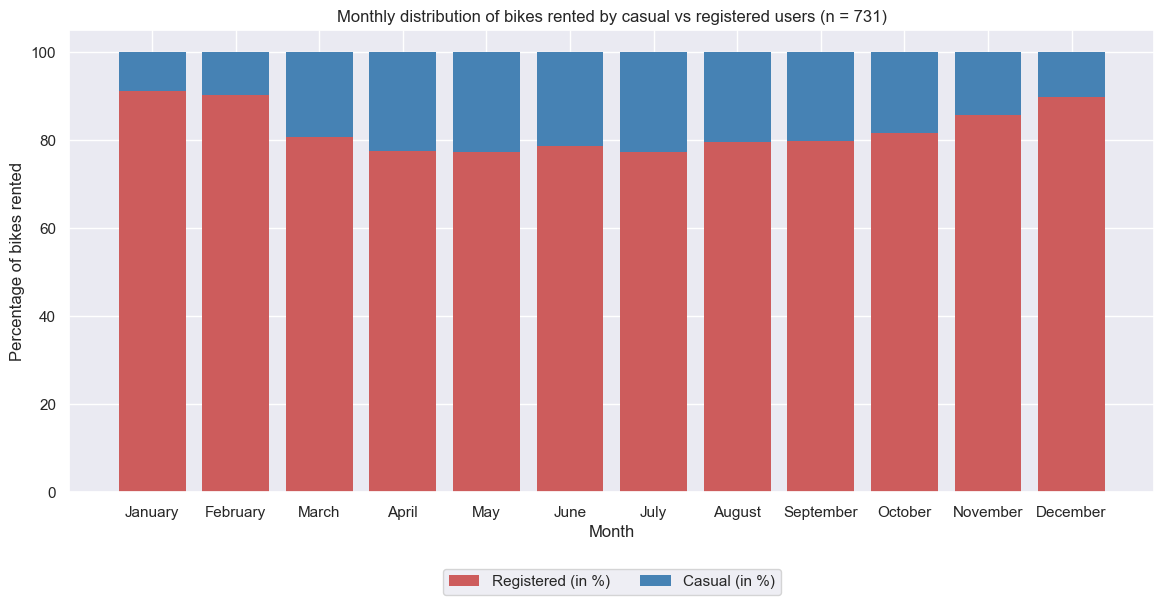

In [ ]:
## Barplot of average bike rentals by month (legend: casual vs registered)

# Calculate the percentage of registered and casual rentals
count_by_month['percent_registered'] = (count_by_month['registered'] / count_by_month['count']) * 100
count_by_month['percent_casual'] = (count_by_month['casual'] / count_by_month['count']) * 100

plt.figure(figsize=(14,6)) # set plot dimensions

# Create the bar plot for percent_registered
plt.bar(count_by_month['month'], count_by_month['percent_registered'], label='Registered (in %)', color='indianred', linewidth=0)

# Add the bar plot for percent_casual
plt.bar(count_by_month['month'], count_by_month['percent_casual'], bottom=count_by_month['percent_registered'], label='Casual (in %)', color='steelblue', linewidth=0)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Percentage of bikes rented')
plt.title('Monthly distribution of bikes rented by casual vs registered users (n = 731)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2) # adjust the position and specs of legend box

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

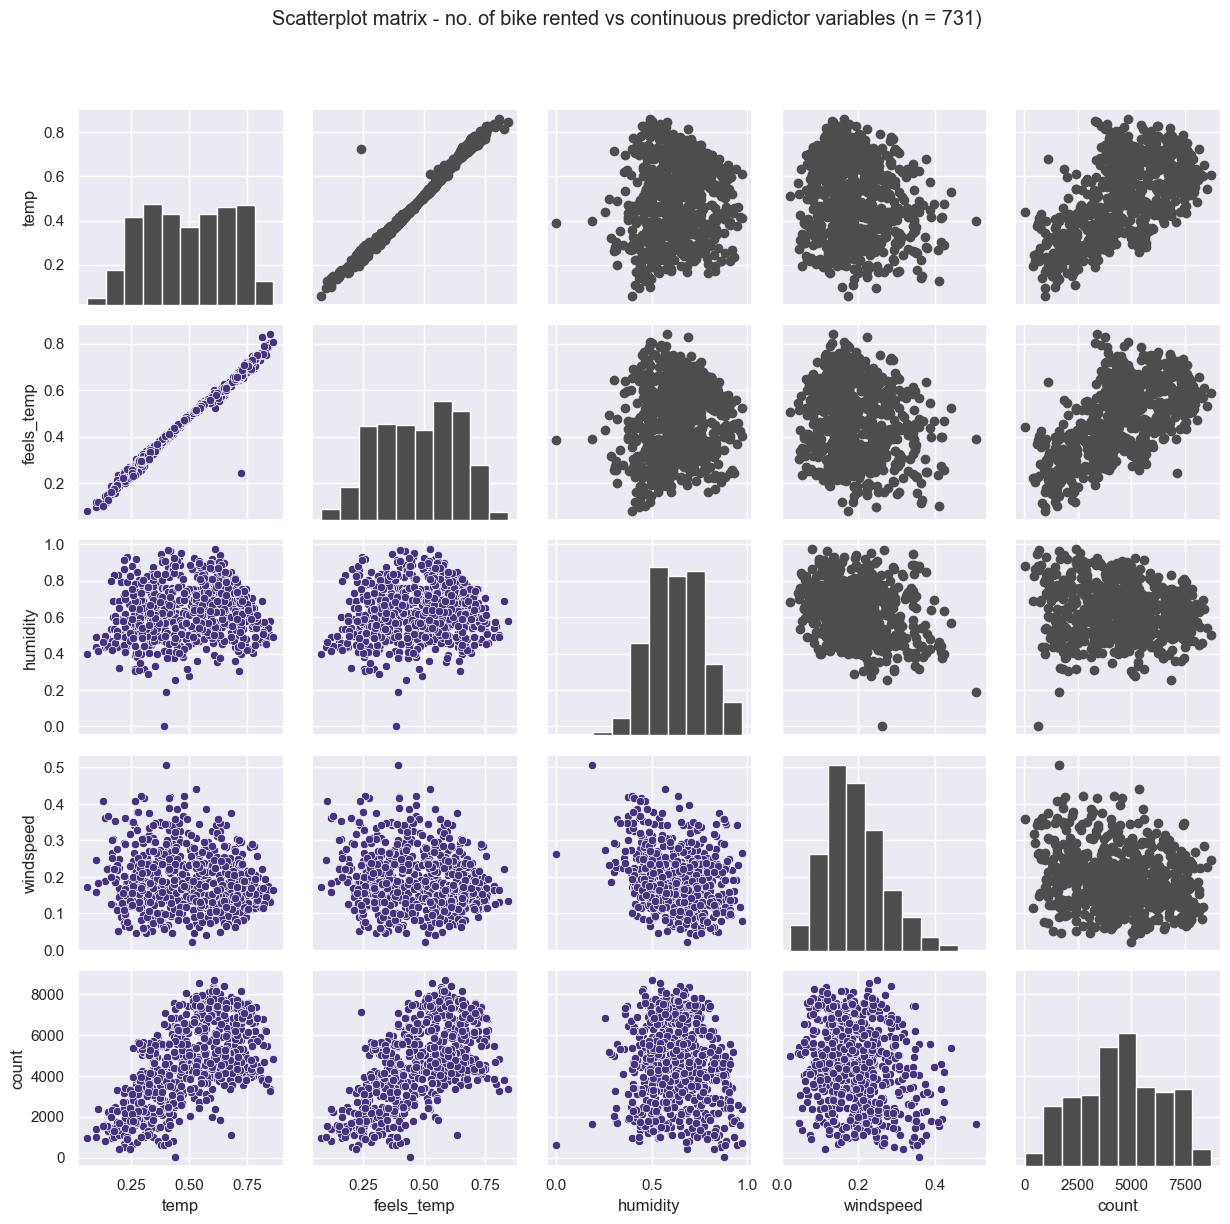

In [ ]:
# Set palette
sns.set_palette("viridis")
plt.figure(figsize=(12,6))

columns_to_plot = ['temp', 'feels_temp', 'humidity', 'windspeed', 'count']
plot9 = sns.PairGrid(bike_rental_df[columns_to_plot])

plot9.map_lower(sns.scatterplot)
plot9.map_upper(plt.scatter, color=".3") # color the remaning plots grey to improve readability of the plot and draw attention to the relevant plots
plot9.map_diag(plt.hist, color=".3")
plot9.fig.subplots_adjust(top=0.9) # adjust the figure
plot9.fig.suptitle('Scatterplot matrix - no. of bike rented vs continuous predictor variables (n = 731)')

plt.show()

## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time.

In [ ]:
# split data into features and dependent var

bike_rental_X = bike_rental_df.drop(columns=['count', 'registered','casual'])
bike_rental_y = bike_rental_df['count']

**Scatter plots of target variable and main independent variable to check liniarity of relationships**

In [ ]:
sns.set_palette("pastel6") #reset palette
sns.set(rc = {'figure.figsize':(6,4)}) # reset dimensions of the plot

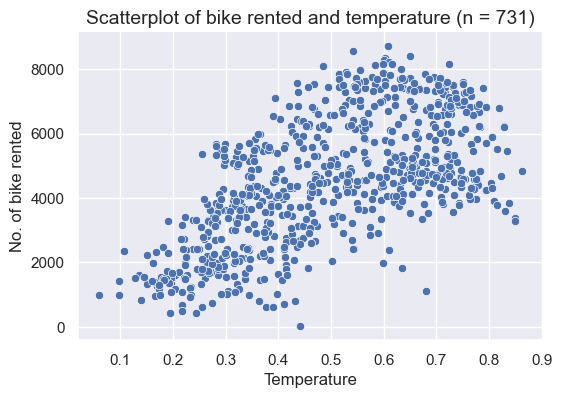

In [ ]:
# Scatterplot of bike rented and temperature
plot10 = sns.scatterplot(data=bike_rental_df, x='temp', y='count')
plot10.set_xlabel('Temperature', fontsize=12)
plot10.set_ylabel('No. of bike rented', fontsize=12)
plot10.set_title('Scatterplot of bike rented and temperature (n = 731)', fontsize=14)
plot10.spines[['top', 'right']].set_visible(False)
plt.show()

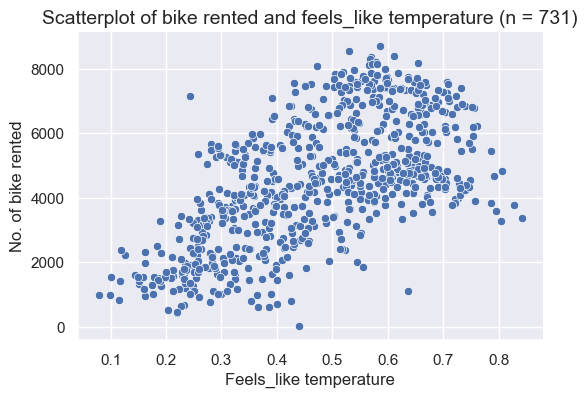

In [ ]:
# Scatterplot of bike rented and 'feels like' temperature
plot11 = sns.scatterplot(data=bike_rental_df, x='feels_temp', y='count')
plot11.set_xlabel('Feels_like temperature', fontsize=12)
plot11.set_ylabel('No. of bike rented', fontsize=12)
plot11.set_title('Scatterplot of bike rented and feels_like temperature (n = 731)', fontsize=14)
plot11.spines[['top', 'right']].set_visible(False)
plt.show()

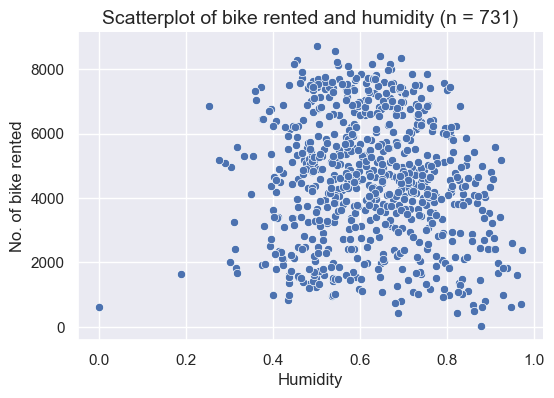

In [ ]:
# Scatterplot of bike rented and humidity
plot12 = sns.scatterplot(data=bike_rental_df, x='humidity', y='count')
plot12.set_xlabel('Humidity', fontsize=12)
plot12.set_ylabel('No. of bike rented', fontsize=12)
plot12.set_title('Scatterplot of bike rented and humidity (n = 731)', fontsize=14)
plot12.spines[['top', 'right']].set_visible(False)
plt.show()

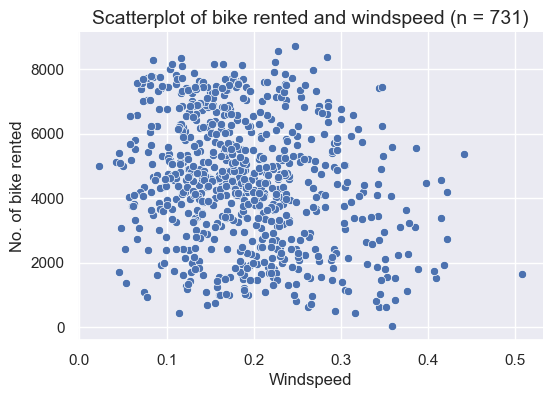

In [ ]:
# Scatterplot of bike rented and windspeed
plot13 = sns.scatterplot(data=bike_rental_df, x='windspeed', y='count')
plot13.set_xlabel('Windspeed', fontsize=12)
plot13.set_ylabel('No. of bike rented', fontsize=12)
plot13.set_title('Scatterplot of bike rented and windspeed (n = 731)', fontsize=14)
plot13.spines[['top', 'right']].set_visible(False)
plt.show()

The scatterplots of `count` and `temp` or `feels_temp` suggest that there exists a linear relationship between these variables and the target variable. The other two scatterplots (for `humidity` and `windspeed` variables) are difficult to infer. Despite the ambiguity in the nature of relationships, we will go ahead with linear regression

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


In [ ]:
**Encode the categorical variables**

In [ ]:
# We will use ordinal encoding for 'weekday' and 'month', which are ordinal categorical variables, and OneHot encoding for the remaining categorical variables

bike_rental_X_transformed = pd.get_dummies(bike_rental_X, columns=['season', 'holiday', 'working_day', 'weather']) # dummy encoding

In [ ]:
# Extract list of unique values in month and weekday columns
print(bike_rental_X['month'].unique().tolist())
print(bike_rental_X['weekday'].unique().tolist())

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


In [ ]:
# Set order for encoding
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
weekdays = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [ ]:
# Initialize encoder with months and weekdays categories
encoder = OrdinalEncoder(categories=[months, weekdays], handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform the ordinal encoder on month and weekday columns
bike_rental_X_transformed[['month', 'weekday']] = encoder.fit_transform(bike_rental_X_transformed[['month', 'weekday']])

In [ ]:
bike_rental_X_transformed.head(2) # check data

,month,weekday,temp,feels_temp,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,holiday_No,holiday_Yes,working_day_No,working_day_Yes,weather_clear,weather_cloudy,weather_light rain
0,0.0,0.0,0.344167,0.363625,0.805833,0.160446,0,0,0,1,1,0,1,0,0,1,0
1,0.0,1.0,0.363478,0.353739,0.696087,0.248539,0,0,0,1,1,0,1,0,0,1,0


**Note:** Also checked the R2 score for LinearReg with OHE for all variables; the results were only slightly lower. Decided against target encoding given the concerns of overfitting (see: https://maxhalford.github.io/blog/target-encoding/). Hence, a combination or ordinal and one-hot seemed to be the best approach for encoding this dataset.

**Check correlation between variables**

In [ ]:
# Set theme
sns.set_theme(style="white")

In [ ]:
# Correlation matrix for feature matrix
corr = bike_rental_X_transformed.corr()

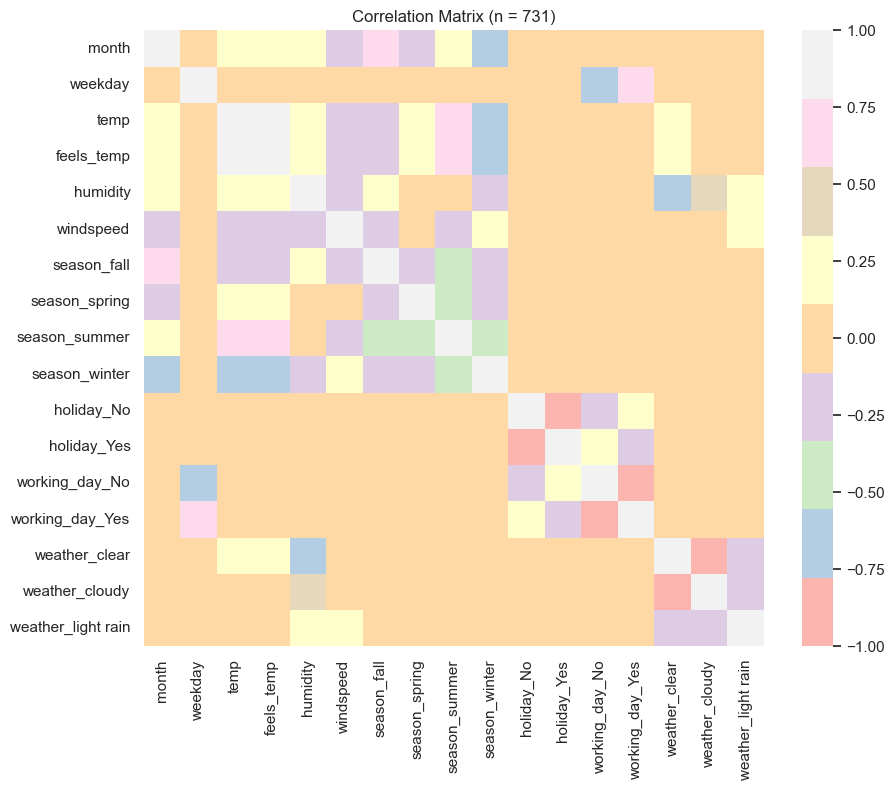

In [ ]:
# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Pastel1', fmt='.2f', square=False)
plt.title('Correlation Matrix (n = 731)')
plt.show()

**Next steps:**
+ Drop `feels_temp` as it is highly correlated with `temp`; we can keep any one of the two variables in the model
+ Drop variables `holiday_no`, `working_day_No` and `weather_cloudy`, which are highly correlated to their counterpart (however, in general, we don't need to drop dummy category in OHE when doing penalized regression as it may induce bias in the model (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). However, we will do so in this case as specified in the question)

In [ ]:
bike_rental_X_transformed.drop(['feels_temp', 'holiday_No', 'working_day_No', 'weather_cloudy'], axis=1, inplace=True)

In [ ]:
bike_rental_X_transformed.head() # check data

,month,weekday,temp,humidity,windspeed,season_fall,season_spring,season_summer,season_winter,holiday_Yes,working_day_Yes,weather_clear,weather_light rain
0,0.0,0.0,0.344167,0.805833,0.160446,0,0,0,1,0,0,0,0
1,0.0,1.0,0.363478,0.696087,0.248539,0,0,0,1,0,0,0,0
2,0.0,2.0,0.196364,0.437273,0.248309,0,0,0,1,0,1,1,0
3,0.0,3.0,0.200000,0.590435,0.160296,0,0,0,1,0,1,1,0
4,0.0,4.0,0.226957,0.436957,0.186900,0,0,0,1,0,1,1,0


### Comment
We can see that 'temp' and 'feels_temp' are highly correlated (>=0.99). We'll drop 'temp' from the dataframe. Although 'temp' is a more accurate measure of temperature, our aim is to predict 'count' of bike rented - which is dependent on whether or not people rent bikes. When using temperature as a factor of decision in renting bikes, a person is more like to depend on how it *feels*, not what the accurate measure of temperature is. Which is why, we'll drop the 'temp' variable. Also note, given the high correlation, the choice of variable dropped wouldn't make a huge difference to model accuracy.

From the correlation matrix, we can also see that temperature variables are also correlated with the dependent variable (count). This suggests that Ridge regression might be the way foward in this situation.

**Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [ ]:
# Split 60% data into training and remaining 40% as is
bike_rental_X_train, X_remaining, bike_rental_y_train, y_remaining = train_test_split(bike_rental_X_transformed, bike_rental_y, test_size=0.4, random_state=5465)

# Split the remaining data (40%) into validation (20%) and test (20%)
bike_rental_X_val, bike_rental_X_test, bike_rental_y_val, bike_rental_y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=5465)

# Print the shapes of sets
print("Training set:", bike_rental_X_train.shape, bike_rental_y_train.shape)
print("Test set:", bike_rental_X_test.shape, bike_rental_y_test.shape)
print("Validation set:", bike_rental_X_val.shape, bike_rental_y_val.shape)

Training set: (438, 13) (438,)
Test set: (147, 13) (147,)
Validation set: (146, 13) (146,)


In [ ]:
# Reshape y variable training, validation and test sets
bike_rental_y_train = np.array(bike_rental_y_train).reshape(-1, 1)
bike_rental_y_val = np.array(bike_rental_y_val).reshape(-1, 1)
bike_rental_y_test = np.array(bike_rental_y_test).reshape(-1, 1)

# Recheck the shapes of sets
print("Training set:", bike_rental_X_train.shape, bike_rental_y_train.shape)
print("Test set:", bike_rental_X_test.shape, bike_rental_y_test.shape)
print("Validation set:", bike_rental_X_val.shape, bike_rental_y_val.shape)

Training set: (438, 13) (438, 1)
Test set: (147, 13) (147, 1)
Validation set: (146, 13) (146, 1)


**Standardize the columns in the feature matrices.**

In [ ]:
# Standardize all variables (num + cat; encoded)
scaler = StandardScaler()
bike_rental_X_train_scaled = scaler.fit_transform(bike_rental_X_train)
bike_rental_X_test_scaled = scaler.transform(bike_rental_X_test)
bike_rental_X_val_scaled = scaler.transform(bike_rental_X_val)

In [ ]:
#Adding a column of ones to the feature matrices for the bias term.

bike_rental_X_train_scaled = np.hstack([np.ones((bike_rental_X_train_scaled.shape[0], 1)), bike_rental_X_train_scaled])
bike_rental_X_val_scaled = np.hstack([np.ones((bike_rental_X_val_scaled.shape[0], 1)), bike_rental_X_val_scaled])
bike_rental_X_test_scaled = np.hstack([np.ones((bike_rental_X_test_scaled.shape[0], 1)), bike_rental_X_test_scaled])

# Generally, bias term is the mean of dependent variables; not sure

### Implement Linear Regression

In [ ]:
## Note: Specific linear regression class created for the purposes of this assignment. Results similar to skearn's LinearRegression

class LinearRegression():
    '''
    Linear regression model with L2-regularization (i.e. ridge regression).

    Attributes
    ----------
    alpha: regularization parameter
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0):
        self.alpha = alpha
        self.w = None

    def train(self, X, y):
        '''Trains model using ridge regression closed-form solution
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        None
        '''
        m, n = X.shape
        A = np.dot(X.T, X) + self.alpha*np.identity(n)
        B = np.dot(X.T, y)
        self.w = np.linalg.solve(A, B)

        return None

    def predict(self, X):
        '''Predicts on X using trained model.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) prediction vector
        '''
        y_pred = np.dot(X, self.w)
        return y_pred

### Train, Evaluate, and Interpret LR Model

In [ ]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    # Reshape to 1D
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [ ]:
linear_reg_model = LinearRegression(alpha=0)
linear_reg_model.train(bike_rental_X_train_scaled, bike_rental_y_train)

In [ ]:
# Predicting values for training set
y_pred_train = linear_reg_model.predict(bike_rental_X_train_scaled)
r2_train = r2_score(bike_rental_y_train, y_pred_train)
print("R-squared on training set:", r2_train)

# Predicting values for validation set
y_pred_val = linear_reg_model.predict(bike_rental_X_val_scaled)
r2_val = r2_score(bike_rental_y_val, y_pred_val)
print("R-squared on validation set:", r2_val)

# Predicting values for testing set
y_pred_test = linear_reg_model.predict(bike_rental_X_test_scaled)
r2_test = r2_score(bike_rental_y_test, y_pred_test)
print("R-squared on test set:", r2_test)

R-squared on training set: 0.530361787569732
R-squared on validation set: 0.6036538386812194
R-squared on test set: 0.5605683542611568


In [ ]:
print('Training set:')
print(get_report(y_pred_train, bike_rental_y_train))

print('Validation set:')
print(get_report(y_pred_val, bike_rental_y_val))

print('Testing set:')
print(get_report(y_pred_test, bike_rental_y_test))

Training set:
           Prediction  Actual
Position                     
1         3112.136882    4569
2         6061.181848    7458
3         2806.259426    1607
436       5562.240268    6779
437       3478.036742    5382
438       5625.341419    7273
Validation set:
           Prediction  Actual
Position                     
1         2332.547679    1421
2         4604.113166    4575
3         5222.601615    6398
144       4272.315251    2425
145       4596.422102    4359
146       4684.472384    5992
Testing set:
           Prediction  Actual
Position                     
1         4336.509812    5255
2         4225.227157    4128
3         3156.819162    2455
145       4898.942104    3071
146       5626.878599    5217
147       2794.594341    1600


In [ ]:
# As the mean of the training labels (bike_rental_y_train) is a constant, we'd need to resize the np array for training, validation and test sets to calculate R2 values

mean_y_train = np.full_like(bike_rental_y_train, np.mean(bike_rental_y_train)) # size: bike_rental_y_train
mean_y_test = np.full_like(bike_rental_y_test, np.mean(bike_rental_y_train)) # size: bike_rental_y_test
mean_y_val = np.full_like(bike_rental_y_val, np.mean(bike_rental_y_train)) # size: bike_rental_y_val

r2_train_base = r2_score(bike_rental_y_train, mean_y_train)
print("R-squared on training set (base model):", r2_train_base)

r2_val_base = r2_score(bike_rental_y_val, mean_y_val)
print("R-squared on validation set (base model):", r2_val_base)


r2_test_base = r2_score(bike_rental_y_test, mean_y_test)
print("R-squared on test set (base model):", r2_test_base)

R-squared on training set (base model): -4.5607362331168133e-10
R-squared on validation set (base model): -0.010163744609734238
R-squared on test set (base model): -0.0051338937102651805


**Feature importance**

In [ ]:
model_w = linear_reg_model.w # extract model weights

feature_labels = ['bias','month', 'weekday', 'temp', 'humidity', 'windspeed',
                  'season_fall', 'season_spring', 'season_summer', 'season_winter',
                  'holiday_Yes', 'working_day_Yes',
                  'weather_clear', 'weather_light rain'] # feature labels from feature matrix

In [ ]:
model_w = model_w.reshape(-1)
model_w.shape

(14,)

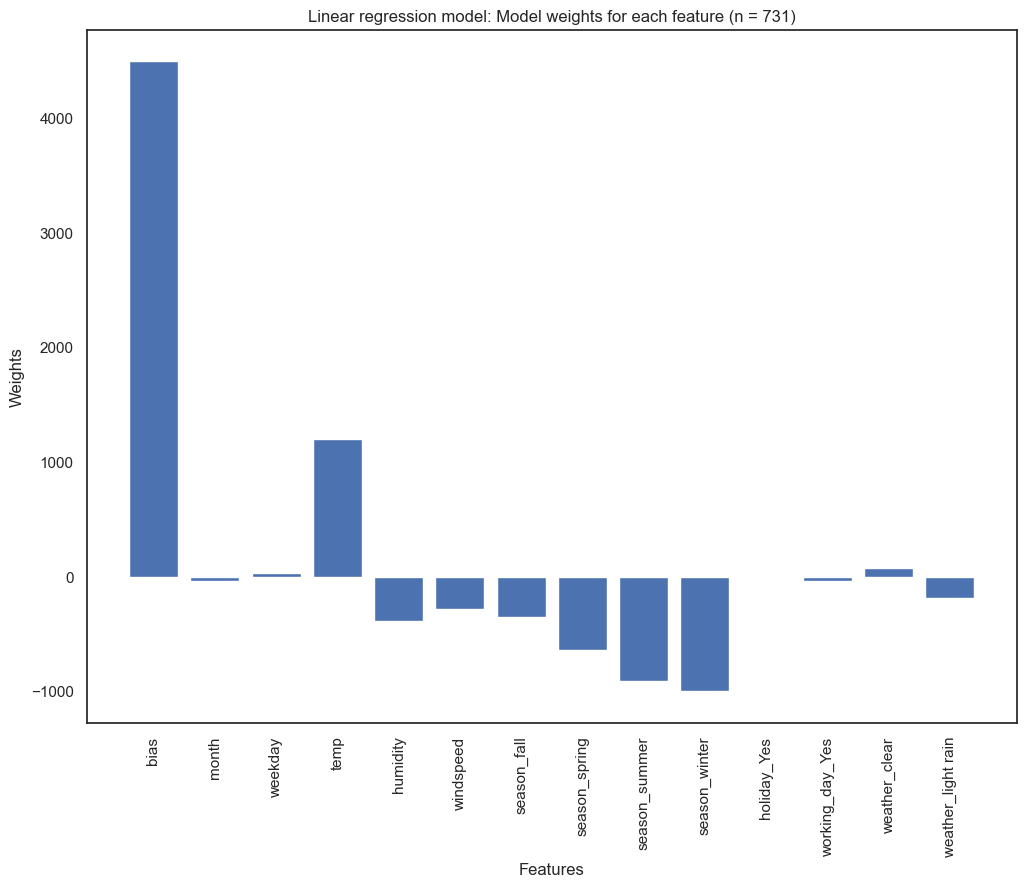

In [ ]:
# Plot the weights on a bar chart
plt.figure(figsize=(12, 9))
plt.bar(feature_labels, model_w)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Linear regression model: Model weights for each feature (n = 731)')
plt.xticks(rotation=90)
plt.show()

**Summary:** The greatest contributers to the count of bikes rented are `seasons`. Specifically,`season_winter` and `season_summer` have a high negative weight. Temperature (`temp`) also has a high positive weight in the LR model.

### Hyperparameter Tuning ($\alpha$)

In [ ]:
# Intialize var to store R2 values
r2_train_list = []
r2_test_list = []
r2_val_list = []

In [ ]:
alpha = np.logspace(-5, 2, 20) # up to 10^2 to better visualize the R2 drop

In [ ]:
for a in alpha:
    ridge_reg_model = LinearRegression(alpha=a)
    ridge_reg_model.train(bike_rental_X_train_scaled,bike_rental_y_train) # train the model

    # Predict y
    y_pred_train_ridge = ridge_reg_model.predict(bike_rental_X_train_scaled)
    y_pred_test_ridge = ridge_reg_model.predict(bike_rental_X_test_scaled)
    y_pred_val_ridge = ridge_reg_model.predict(bike_rental_X_val_scaled)

    # Calculate R-squared
    r2_train_list.append(r2_score(bike_rental_y_train, y_pred_train_ridge))
    r2_test_list.append(r2_score(bike_rental_y_test, y_pred_test_ridge))
    r2_val_list.append(r2_score(bike_rental_y_val, y_pred_val_ridge))

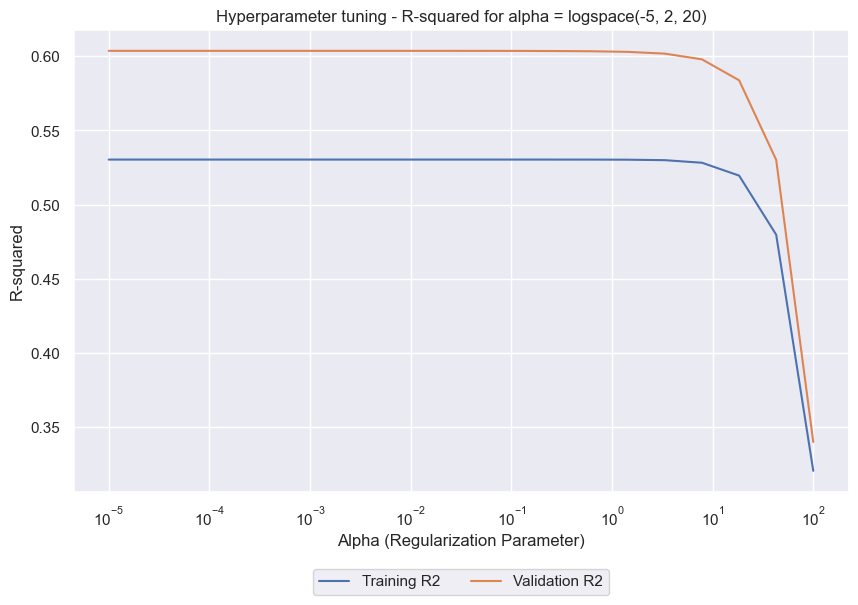

In [ ]:
sns.set_palette("pastel6") #reset palette
sns.set(rc = {'figure.figsize':(10,6)}) # reset dimensions of the plot

# Plot the training R-squared
sns.lineplot(x=alpha, y=r2_train_list, label='Training R2')

# Plot the validation R-squared
sns.lineplot(x=alpha, y=r2_val_list, label='Validation R2')

plt.xscale('log')  # Use a log scale for the x-axis
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('Hyperparameter tuning - R-squared for alpha = logspace(-5, 2, 20)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=3)
plt.show()

**Summary:**
The training and validation R2 value remains constant as model complexity decreases till alpha = log(10^1); post thart, R2 suddenly drops down. This might suggest that we do not need ridge regression for this dataset, and a simpler model (multivariate linear regression) might perform better or equal to ridge regression.
We did observe non-linear relationships between some of the predictors and target variable earlier; it's also possible that non-linear model might perforn better.

### 2.2 Logistic Regression

Dataset used: `load_data_csv`.
Target variable" `Loan_Status` (binary)

In [ ]:
# Load the dataset
loan_data_df = pd.read_csv('./Data/loan_data.csv')
loan_data_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

In [ ]:
loan_data_df['Credit_History'] = loan_data_df['Credit_History'].replace({1.0: 'Yes', 0.0: 'No'})
# Replaced the numerical values in Credit_History categorical variable. This just makes interpretation a little easier when comparing features. Does not affect subsequent steps
loan_data_df['Loan_Status'] = loan_data_df['Loan_Status'].replace({'Y': 1, 'N': 0}) # convert label variable to numeric values

**Check missing values**

In [ ]:
loan_data_df.isnull().sum() # yes, there are missing values in the dataset

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Replace missing values in numerical columns with median
numerical_columns = [ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',]
loan_data_df[numerical_columns] = loan_data_df[numerical_columns].fillna(loan_data_df[numerical_columns].mean())

# Replace missing values in categorical columns with mode
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    mode_value = loan_data_df[col].mode().iloc[0]
    loan_data_df[col].fillna(mode_value, inplace=True)

In [ ]:
# Note that 'Loan_Term', while containing numerical values, seems to be a categorical variable with 10 term periods. Hence,this variable was treated as categorical.
loan_data_df['Loan_Amount_Term'].unique().tolist()

[360.0, 120.0, 240.0, 180.0, 60.0, 300.0, 480.0, 36.0, 84.0, 12.0]

**Best way to deal with missing values**:
Ideally, we'd employ different methods to handle missing values depending on the type and purpose of the variable. We'd explore the data collection and storage methods in detail to understand whether missing values are MAR, MNAR or MCAR. As MCAR (missing completely at random) is rather uncommon, I replaced the missing values for continuous variable with the mean, and the missing values for categorical variables with mode. Some other options include:
techniques:
+ Impute missing values for numerical values using multiple imputation (regress missing values using other predictors)
+ Impute missing values for categorical values using KNeighborsClassifier or other classification techniques
+ Collect more data (currently, n= 631).

**2.2.3 Encode the categorical variables.**

In [ ]:
loan_data_df.columns.tolist() # get a list of column names for OHE

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [ ]:
# We will use OHE for all categorical variables
loan_data_df_transformed = pd.get_dummies(loan_data_df, columns=['Gender', 'Married', 'Dependents', 'Education',
                                                                 'Self_Employed','Loan_Amount_Term',
                                                                 'Credit_History', 'Property_Area']) # dummy encoding for all categorical predictors

**Check if distribution is balanced**

In [ ]:
# Calculate value counts and percentages of label variable
label_distribution = loan_data_df_transformed['Loan_Status'].value_counts(normalize=True) * 100

# Create a DataFrame for the frequency table
frequency_table = pd.DataFrame({'Frequency': loan_data_df_transformed['Loan_Status'].value_counts(),
                                'Probability (in %)': label_distribution.round(2)})

print(tabulate(frequency_table, headers='keys'))

      Frequency    Probability (in %)
--  -----------  --------------------
 1          422                 68.73
 0          192                 31.27


**Note:**
Probability of loan_status 'Yes' is nearly twice that of 'No'. We'll keep this in mind while checking model performance

In [ ]:
# split data into features and labelloan_data_df_transformed

loan_data_df_transformed_X = loan_data_df_transformed.drop(columns=['Loan_Status'])
loan_data_df_transformed_y = loan_data_df_transformed['Loan_Status']

In [ ]:
# Set theme and plot dimensions
sns.set_theme(style="white")

In [ ]:
# Correlation matrix for numerical features
corr_2 = loan_data_df_transformed_X.corr(numeric_only=True)

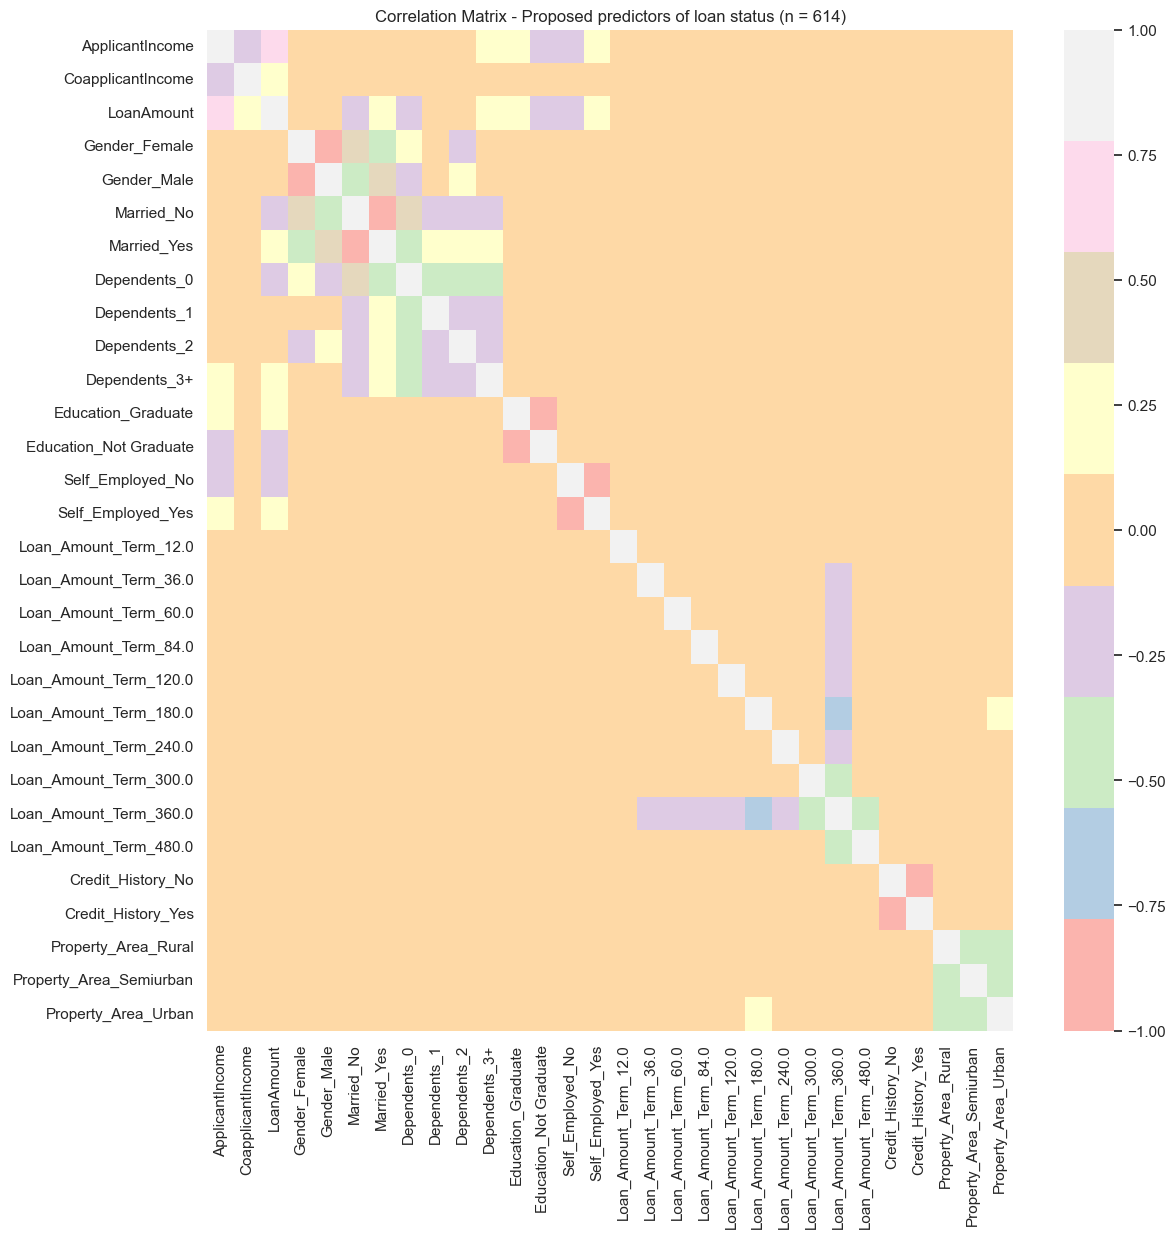

In [ ]:
# Display the correlation matrix
plt.figure(figsize=(13, 13))
sns.heatmap(corr_2, cmap='Pastel1', fmt='.2f', square=False)
plt.title('Correlation Matrix - Proposed predictors of loan status (n = 614)')
plt.show()

In [ ]:
# Drop highly correlated features
loan_data_df_transformed_X.drop(['Gender_Male', 'Married_No',
                                 'Education_Not Graduate', 'Self_Employed_No',
                                 'Credit_History_No'], axis=1, inplace=True) #essentially dropping one ref category for all binary predictor variabes

**Data pre-processing:**

1. Converted the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardized the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Added a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [ ]:
# Convert pd series to numpy array
loan_data_df_transformed_y = loan_data_df_transformed_y.values

In [ ]:
# Split the dataset into train, validate and test sets

# Split 60% data into training and keep remaining 40% as is
loan_X_train, X_remaining, loan_y_train, y_remaining = train_test_split(loan_data_df_transformed_X, loan_data_df_transformed_y, test_size=0.4, random_state=9456)

# Split the remaining data (40%) into validation (20%) and test (20%)
loan_X_val, loan_X_test, loan_y_val, loan_y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=9456)

# Print the shapes of sets
print("Training set:", loan_X_train.shape, loan_y_train.shape)
print("Validation set:", loan_X_val.shape, loan_y_val.shape)
print("Test set:", loan_X_test.shape, loan_y_test.shape)

Training set: (368, 25) (368,)
Validation set: (123, 25) (123,)
Test set: (123, 25) (123,)


In [ ]:
# As y variable should be in shape (m x 1), we need to reshape the target matrices
loan_y_train = loan_y_train.reshape(-1, 1)
loan_y_test = loan_y_test.reshape(-1, 1)
loan_y_val = loan_y_val.reshape(-1, 1)

# Confirm the shapes of sets
print("Training set:", loan_X_train.shape, np.array(loan_y_train).shape)
print("Validation set:", loan_X_val.shape, np.array(loan_y_val).shape)
print("Test set:", loan_X_test.shape, np.array(loan_y_test).shape)

Training set: (368, 25) (368, 1)
Validation set: (123, 25) (123, 1)
Test set: (123, 25) (123, 1)


In [ ]:
# Standardize all variables (num + cat; encoded)
scaler = StandardScaler()
loan_X_train_scaled = scaler.fit_transform(loan_X_train)
loan_X_val_scaled = scaler.transform(loan_X_val) # standardization parameters taken from training set
loan_X_test_scaled = scaler.transform(loan_X_test) # standardization parameters taken from training set

In [ ]:
#Adding a column of ones to the feature matrices for the bias term.

loan_X_train_scaled = np.hstack([np.ones((loan_X_train_scaled.shape[0], 1)), loan_X_train_scaled])
loan_X_val_scaled = np.hstack([np.ones((loan_X_val_scaled.shape[0], 1)), loan_X_val_scaled])
loan_X_test_scaled = np.hstack([np.ones((loan_X_test_scaled.shape[0], 1)), loan_X_test_scaled])

In [ ]:
## Note: This chunk of code was provided as part of the assingnment

class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

In [ ]:
# Train a logistic regression model with given hyperparameters
logit_model = LogisticRegression(alpha=0, t=100, eta=1e-3)
losses = logit_model.train(loan_X_train_scaled, loan_y_train)

In [ ]:
print("Shape of losses:", np.array(losses).shape)

Shape of losses: (100, 1, 1)


In [ ]:
losses = np.array(losses).reshape(100,1) # to plot losses, we need to reshape it to a 2D array
print("Shape of losses:", np.array(losses).shape)

Shape of losses: (100, 1)


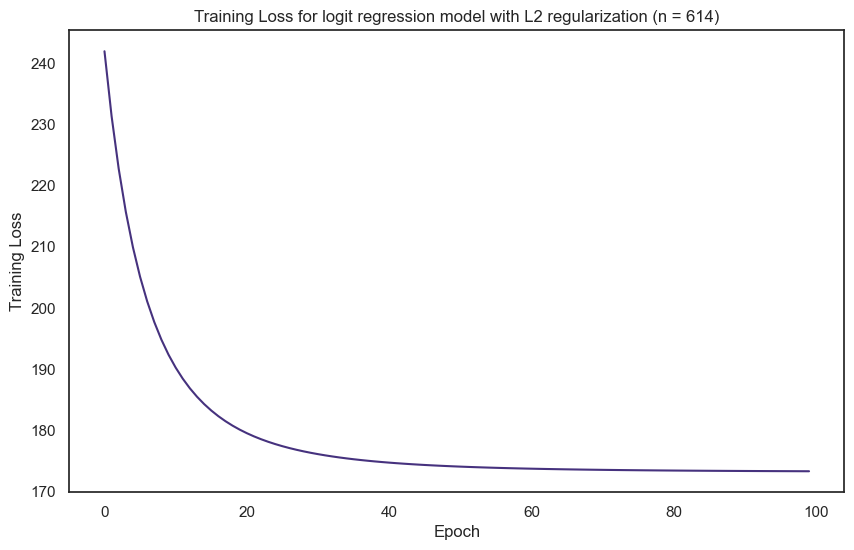

In [ ]:
# Train a logistic regression model with given hyperparameters

sns.set_palette("viridis")
# Plot training loss over epochs
plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss for logit regression model with L2 regularization (n = 614)')

plt.show()


In [ ]:
np.random.seed(6845)

alpha_values = np.random.uniform(0, 1, 20)  # Random alpha between 0 and 1
eta_values = np.random.uniform(0, 0.001, 20)  # Random eta between 0 and 0.001
t_values = np.random.randint(0, 100, 20)  # Random t between 1 and 100

In [ ]:
scores = []
best_score = 0.0
best_hyperparameters = {}


# Perform random search
for alpha, eta, t in zip(alpha_values, eta_values, t_values):
    # Train the logistic regression model
    logit_model2 = LogisticRegression(alpha=alpha, t=t, eta=eta)
    losses = logit_model2.train(loan_X_train_scaled, loan_y_train)

    # Predict on the validation set
    loan_y_val_pred = logit_model2.predict(loan_X_val_scaled)

    score = accuracy_score(loan_y_val, loan_y_val_pred)
    scores.append(score)

    # Update the best hyperparameters
    if score > best_score:
        best_score = score
        best_hyperparameters = {'alpha': alpha, 'eta': eta, 't': t}

# Print the best hyperparameters and corresponding accuracy
print('\nBest Hyperparameters:', best_hyperparameters)
print('Best scores:', best_score)



Best Hyperparameters: {'alpha': 0.9834867304345297, 'eta': 0.0006756312859510579, 't': 64}
Best scores: 0.8536585365853658


In [ ]:
# Note: Given that our dataset was imbalanced, accuracy score may not be the best metric to evaluate the model (https://ieeexplore.ieee.org/document/9075071).
# I also used precision score to evaluate the model. The resultant score was a little lower.

In [ ]:
precisions = []
best_precision = 0.0
best_hyperparameters = {}


# Perform random search
for alpha, eta, t in zip(alpha_values, eta_values, t_values):
    # Train the logistic regression model
    logit_model2 = LogisticRegression(alpha=alpha, t=t, eta=eta)
    losses = logit_model2.train(loan_X_train_scaled, loan_y_train)

    # Predict on the validation set
    loan_y_val_pred = logit_model2.predict(loan_X_val_scaled)

    precision = precision_score(loan_y_val, loan_y_val_pred)
    precisions.append(precision)

    # Update the best hyperparameters
    if precision > best_precision:
        best_precision = precision
        best_hyperparameters = {'alpha': alpha, 'eta': eta, 't': t}

# Print the best hyperparameters and corresponding accuracy
print('\nBest Hyperparameters:', best_hyperparameters)
print('Best precision score:', best_precision)



Best Hyperparameters: {'alpha': 0.31366203852910024, 'eta': 0.0007611738006159505, 't': 7}
Best precision score: 0.8365384615384616


*Compare accuracy on the test dataset.*

In [ ]:
# 'Fixed' model has the hyperparameters defined in (i), and 'best' model has randomly searched best parameters from (ii)

In [ ]:
# Train fixed model
fixed_alpha = 0
fixed_eta = 1e-3
fixed_t = 100
fixed_logit_model = LogisticRegression(alpha=fixed_alpha, t=fixed_t, eta=fixed_eta)
fixed_logit_model.train(loan_X_train_scaled, loan_y_train)

# Predict with fixed hyperparameters on test set
loan_y_test_pred_fixed = fixed_logit_model.predict(loan_X_test_scaled)

# Train best model
best_alpha = best_hyperparameters['alpha']
best_eta = best_hyperparameters['eta']
best_t = best_hyperparameters['t']

best_logit_model = LogisticRegression(alpha=best_alpha, t=best_t, eta=best_eta)
best_logit_model.train(loan_X_train_scaled, loan_y_train)

# Predict with best hyperparameters on test ste
loan_y_test_pred_best = best_logit_model.predict(loan_X_test_scaled)

# Calculate accuracy scores for both models on the test dataset
accuracy_fixed = accuracy_score(loan_y_test, loan_y_test_pred_fixed)
accuracy_best = accuracy_score(loan_y_test, loan_y_test_pred_best)

# Print accuracy scores
print('Accuracy score using fixed hyperparameters:', accuracy_fixed)
print('Accuracy score using best hyperparameters from random search:', accuracy_best)

# Calculate precision scores for both models on the test dataset
precision_fixed = precision_score(loan_y_test, loan_y_test_pred_fixed)
precision_best = precision_score(loan_y_test, loan_y_test_pred_best)

# Print precision scores
print('Precision score using fixed hyperparameters:', accuracy_fixed)
print('Precision score using best hyperparameters from precision_fixed search:', precision_best)


Accuracy score using fixed hyperparameters: 0.8699186991869918
Accuracy score using best hyperparameters from random search: 0.8455284552845529
Precision score using fixed hyperparameters: 0.8699186991869918
Precision score using best hyperparameters from precision_fixed search: 0.8877551020408163


**Feature Importance**

In [ ]:
model_w_logit = best_logit_model.w # as best model had higher precision score
features_logit = ['bias', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                  'Gender_Female', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
                  'Education_Graduate', 'Self_Employed_Yes', 'Loan_Amount_Term_12.0', 'Loan_Amount_Term_36.0',
                  'Loan_Amount_Term_60.0', 'Loan_Amount_Term_84.0', 'Loan_Amount_Term_120.0', 'Loan_Amount_Term_180.0',
                  'Loan_Amount_Term_240.0', 'Loan_Amount_Term_300.0', 'Loan_Amount_Term_360.0', 'Loan_Amount_Term_480.0',
                  'Credit_History_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

In [ ]:
model_w_logit = model_w_logit.reshape(-1) # reshape model weights
model_w_logit.shape

(26,)

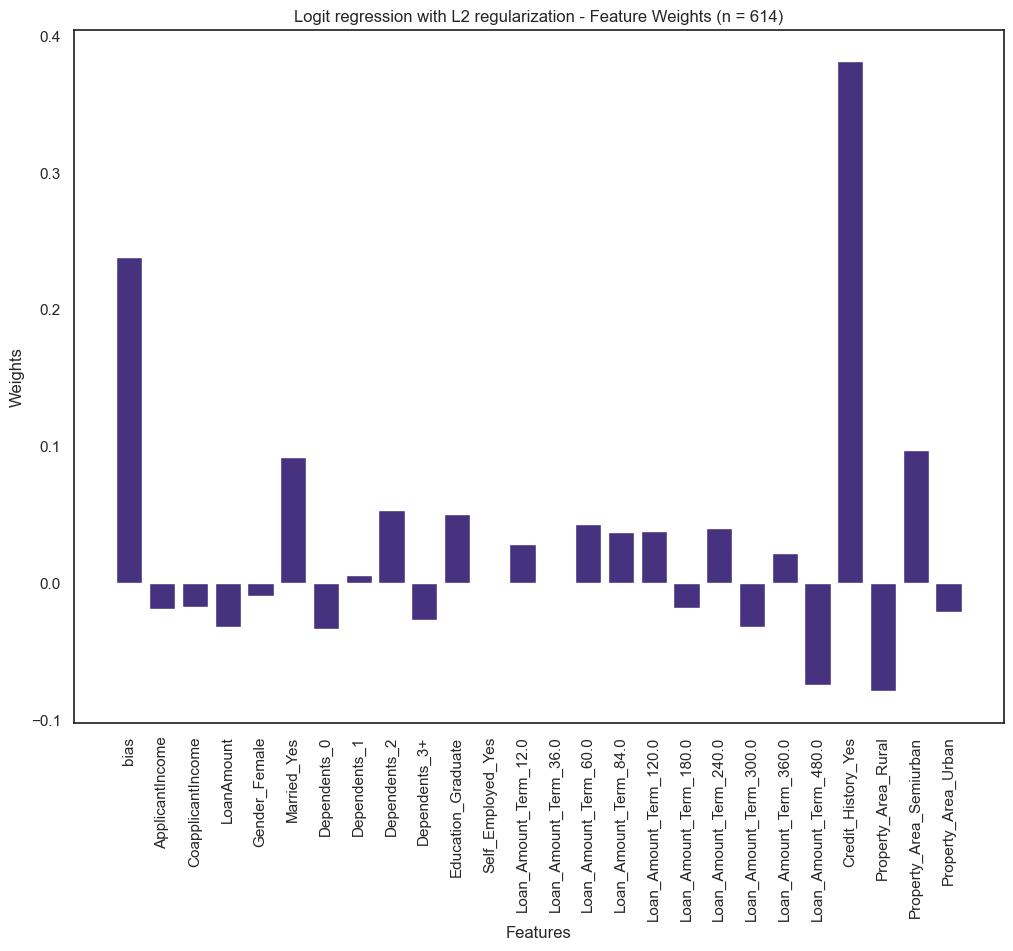

In [ ]:
# Plot the weights on a bar chart
plt.figure(figsize=(12, 9))
plt.bar(features_logit, model_w_logit)
plt.xlabel('Features')
plt.ylabel('Weights')
plt.title('Logit regression with L2 regularization - Feature Weights (n = 614)')
plt.xticks(rotation=90)
plt.show()

**Comments:**

We can see that `Credit_History_Yes` has the highest positive weight in the model, which aligns with anecdotal evidence that people who have a credit history are more like to have approved loan status. Some other features that contribute to the model are `Property_Area_Semiurban`, `Property_Area_Rural`, `Loan_Amount_Term_480` and `Married_Yes` (martial status).

`Self_Employed` seems to have minimal weights in the model, and surprisingly, `ApplicantIncome` also has lower weights.

### 2.3 Support Vector Machines

### Train Primal SVM

In [ ]:
primal_svc = LinearSVC(dual=False,random_state=583) # default paramateres

In [ ]:
loan_y_train = loan_y_train.ravel()

In [ ]:
loan_y_val = loan_y_val.ravel()
loan_y_test = loan_y_test.ravel()

In [ ]:
primal_svc.fit(loan_X_train_scaled, loan_y_train) #fit SVM

LinearSVC(dual=False, random_state=583)

In [ ]:
score = primal_svc.score(loan_X_train_scaled, loan_y_train)
print("Score:", score) # check training score

Score: 0.7880434782608695


In [ ]:
# Make predictions on validation data
loan_y_val_pred = primal_svc.predict(loan_X_val_scaled)

# Print confusion matrix to evaluate model
cm1 = confusion_matrix(loan_y_val, loan_y_val_pred)
print(cm1)

[[17 18]
 [ 0 88]]


In [ ]:
# Make predictions on test data
loan_y_test_pred = primal_svc.predict(loan_X_test_scaled)

# Print confusion matrix to evaluate model
cm2 = confusion_matrix(loan_y_test, loan_y_test_pred)
print(cm2)

[[17 11]
 [ 4 91]]


In [ ]:
# Calculate accuracy on training, validation and test sets

# training score
score_train = cross_val_score(primal_svc, loan_X_train_scaled, loan_y_train, cv=10, error_score="raise")
print("Training set score:", np.mean(score_train))

# validation score
score_val = cross_val_score(primal_svc, loan_X_val_scaled, loan_y_val, cv=10, error_score="raise")
print("Validation set score:", np.mean(score_val))

# testing score
score_test = cross_val_score(primal_svc, loan_X_test_scaled, loan_y_test, cv=10, error_score="raise")
print("Test set score:", np.mean(score_test))

Training set score: 0.768918918918919
Validation set score: 0.8217948717948719
Test set score: 0.8615384615384615


### Train Dual SVM

In [ ]:
dual_svc = LinearSVC(dual=True,random_state=583) # default paramateres

In [ ]:
dual_svc.fit(loan_X_train_scaled, loan_y_train)

C:\Users\shefa\anaconda3\envs\First_Env\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=True, random_state=583)

In [ ]:
# As model failed to converge, we increase the no. of iterations
dual_svc = LinearSVC(max_iter=100000, dual=True,random_state=583)

In [ ]:
dual_svc.fit(loan_X_train_scaled, loan_y_train)

LinearSVC(dual=True, max_iter=100000, random_state=583)

In [ ]:
# Training score
score = dual_svc.score(loan_X_train_scaled, loan_y_train)
print("Score:", score)

Score: 0.7880434782608695


In [ ]:
# Predictions on validation data
loan_y_val_pred = dual_svc.predict(loan_X_val_scaled)

cm1 = confusion_matrix(loan_y_val, loan_y_val_pred)
print(cm1)

[[17 18]
 [ 0 88]]


In [ ]:
# Make predictions on test data
loan_y_test_pred = dual_svc.predict(loan_X_test_scaled)

cm2 = confusion_matrix(loan_y_test, loan_y_test_pred)
print(cm2)

[[17 11]
 [ 4 91]]


In [ ]:
# Results similar to primal SVC

In [ ]:
# Calculate accuracy on training, validation and test sets

# training score
score_train = cross_val_score(dual_svc, loan_X_train_scaled, loan_y_train, cv=10, error_score="raise")
print("Training set score:", np.mean(score_train))

# validation score
score_val = cross_val_score(dual_svc, loan_X_val_scaled, loan_y_val, cv=10, error_score="raise")
print("Validation set score:", np.mean(score_val))

# testing score
score_test = cross_val_score(dual_svc, loan_X_test_scaled, loan_y_test, cv=10, error_score="raise")
print("Test set score:", np.mean(score_test))

Training set score: 0.768918918918919
Validation set score: 0.8217948717948719
Test set score: 0.8615384615384615
